In [122]:

import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore")
%matplotlib inline

In [123]:
df=pd.read_csv('https://raw.githubusercontent.com/Lokeshrajkp/Placement-Assignment_Lokeshraj-K-P/main/Machine%20learning/ObesityDataSet_raw_and_data_sinthetic.csv')

In [124]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [125]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

#Attributes related with eating habits are:

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC), 

Number of main meals (NCP),

Consumption of food between meals (CAEC), 

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

#Attributes related with the physical condition are:

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

#Other variables were:

Gender, Age, Height and Weight.

In [126]:
df.shape

(2111, 17)

In [127]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [128]:
## Checking Details Information related with Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [129]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [130]:
# No null values found

In [131]:
df.duplicated().sum()

24

In [132]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [133]:
df=df.drop_duplicates()

In [134]:
df.shape

(2087, 17)

In [135]:
# Convert object/text variables to category variables
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2087 non-null   category
 1   Age                             2087 non-null   float64 
 2   Height                          2087 non-null   float64 
 3   Weight                          2087 non-null   float64 
 4   family_history_with_overweight  2087 non-null   category
 5   FAVC                            2087 non-null   category
 6   FCVC                            2087 non-null   float64 
 7   NCP                             2087 non-null   float64 
 8   CAEC                            2087 non-null   category
 9   SMOKE                           2087 non-null   category
 10  CH2O                            2087 non-null   float64 
 11  SCC                             2087 non-null   category
 12  FAF                 

In [137]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

In [138]:
#Gender

* There are almost an equal number of females and males in the dataset. Data is available for slightly more men than women but this does not make it imbalanced.

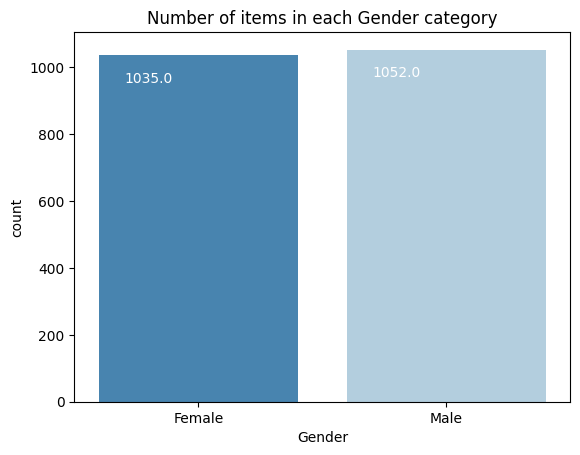

In [139]:
count_values(df, "Gender")

In [140]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

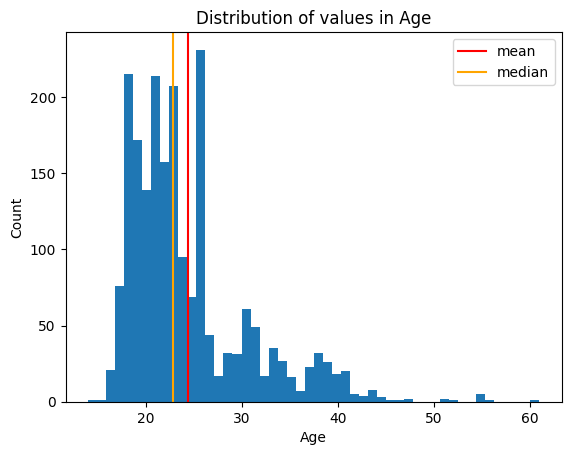

In [141]:
plot_distribution(df, "Age")

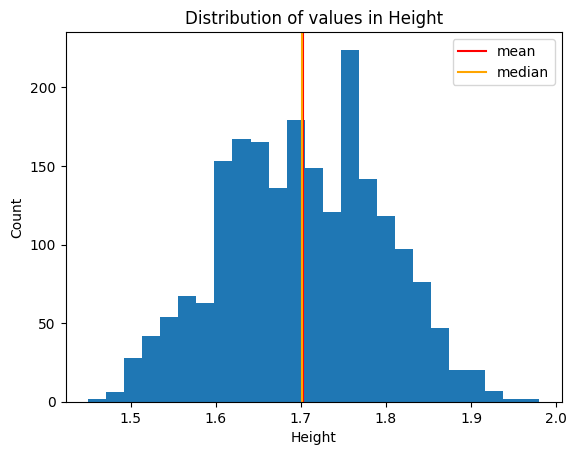

In [142]:
plot_distribution(df, 'Height')

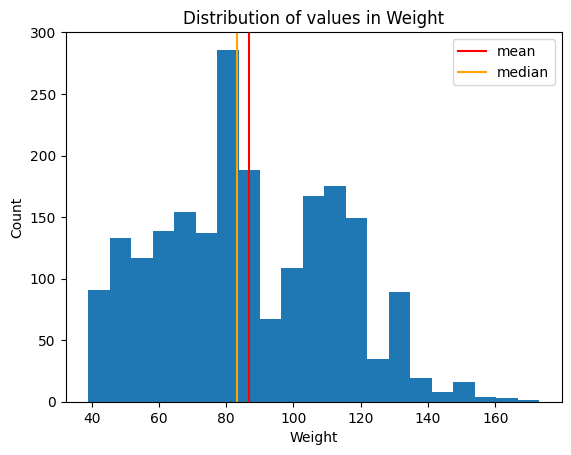

In [143]:
plot_distribution(df, "Weight")

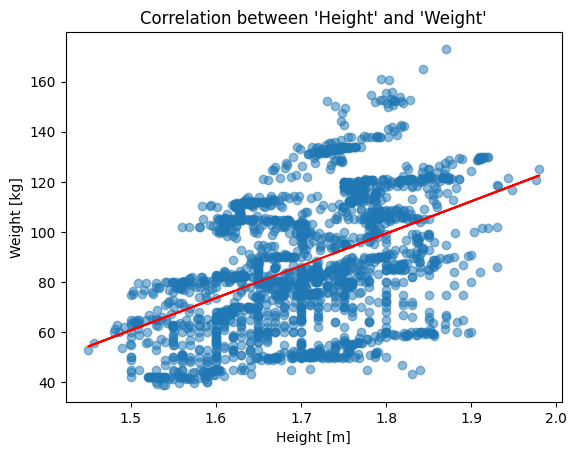

In [144]:
# relation between height & weight
plt.scatter(df["Height"],df["Weight"], alpha = 0.5)
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

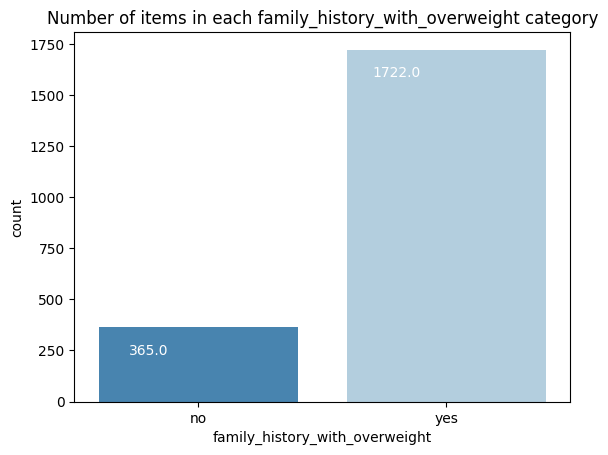

In [145]:
count_values(df, "family_history_with_overweight")

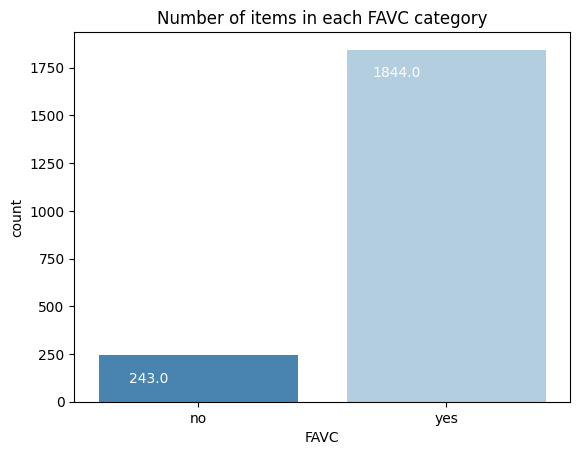

In [146]:
count_values(df, "FAVC")

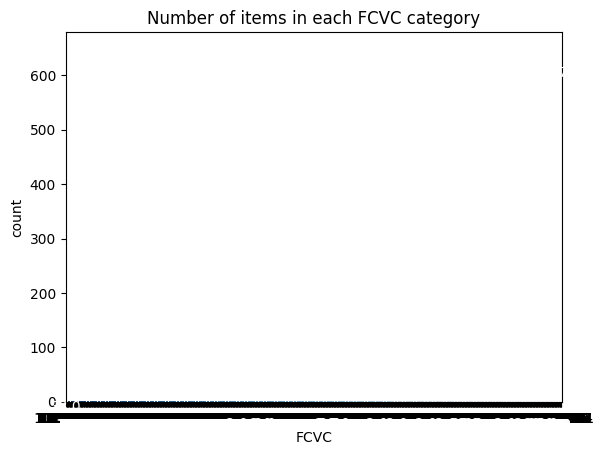

In [147]:
count_values(df, "FCVC")

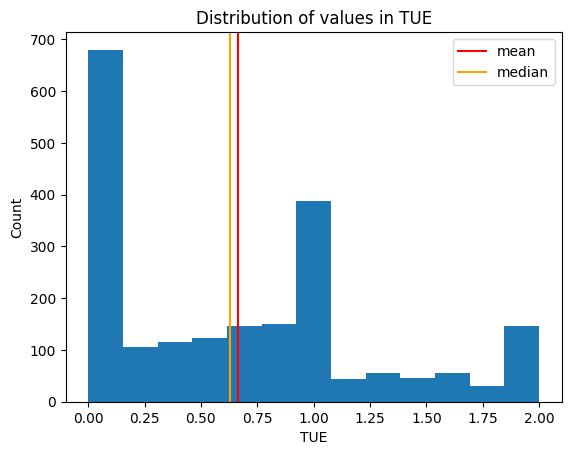

In [148]:
plot_distribution(df, "TUE")

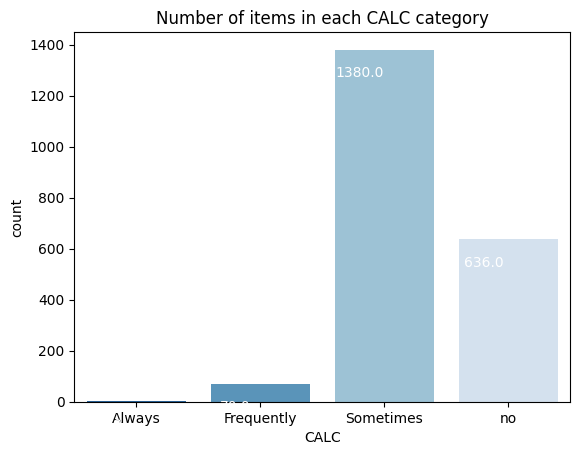

In [149]:
count_values(df, "CALC")

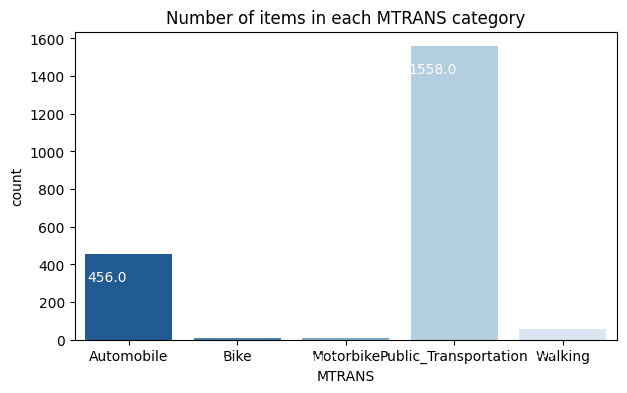

In [150]:
plt.figure(figsize = (7, 4))
count_values(df, "MTRANS")

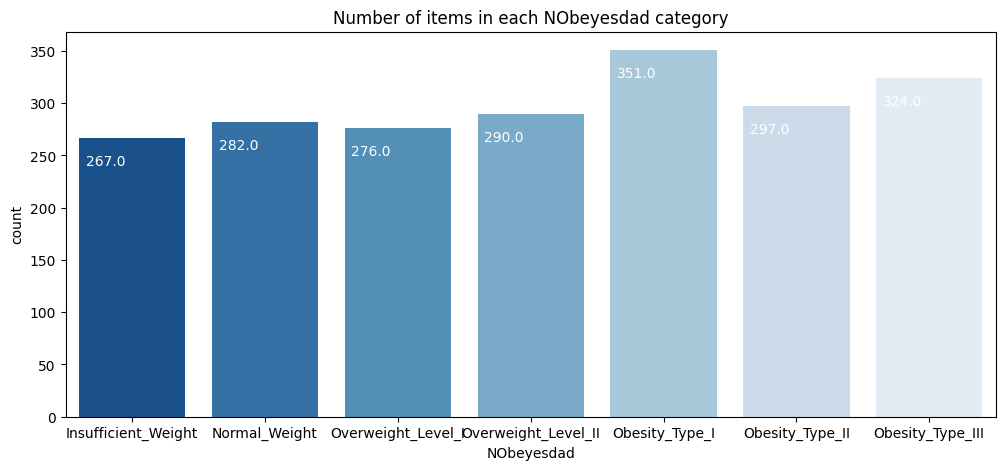

In [151]:
plt.figure(figsize = (12, 5))
count_values(df, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [152]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

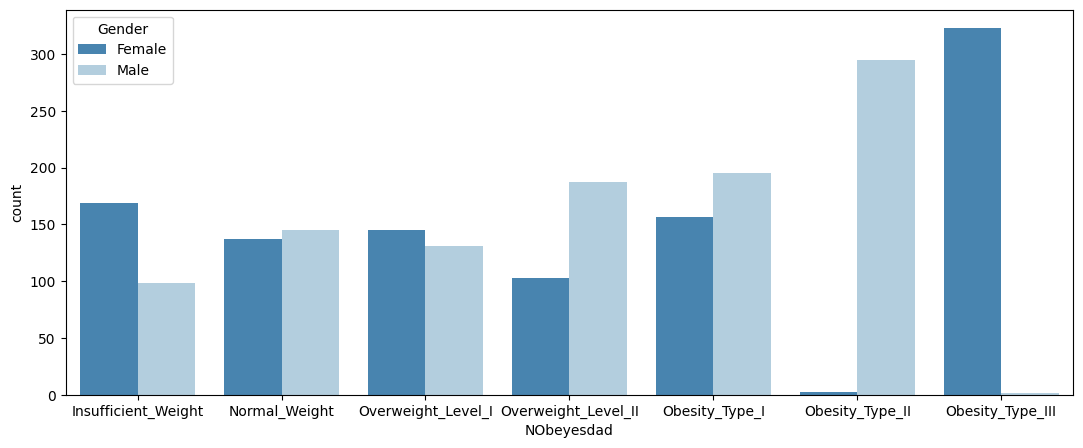

In [153]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

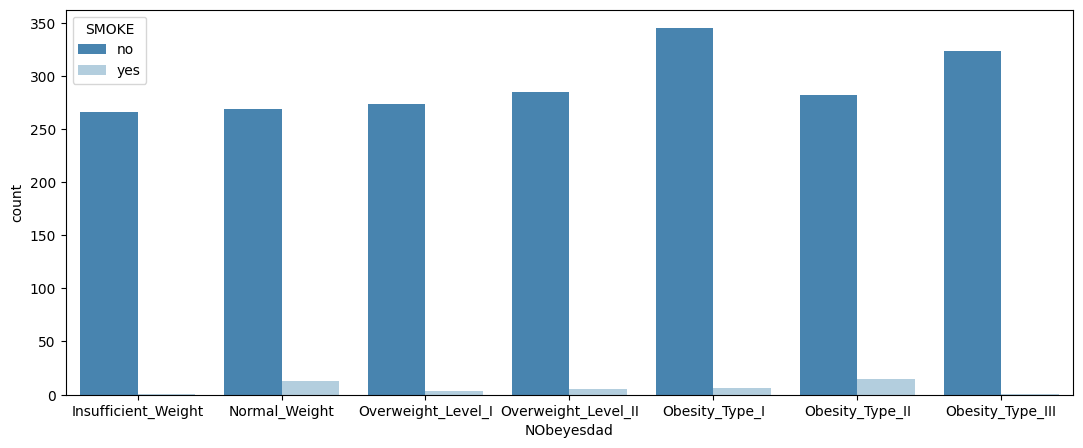

In [154]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

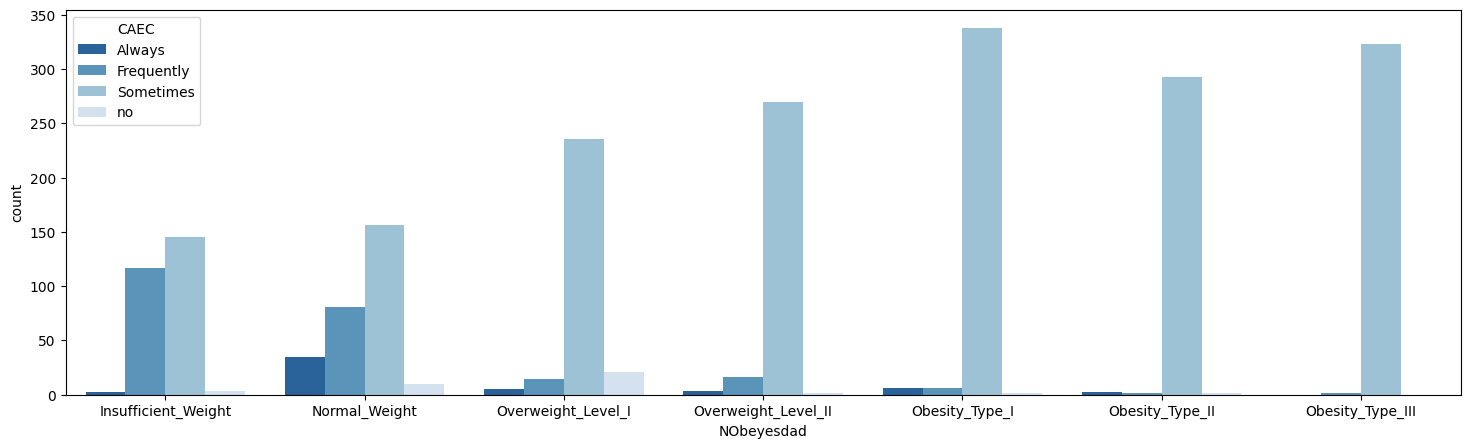

In [155]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

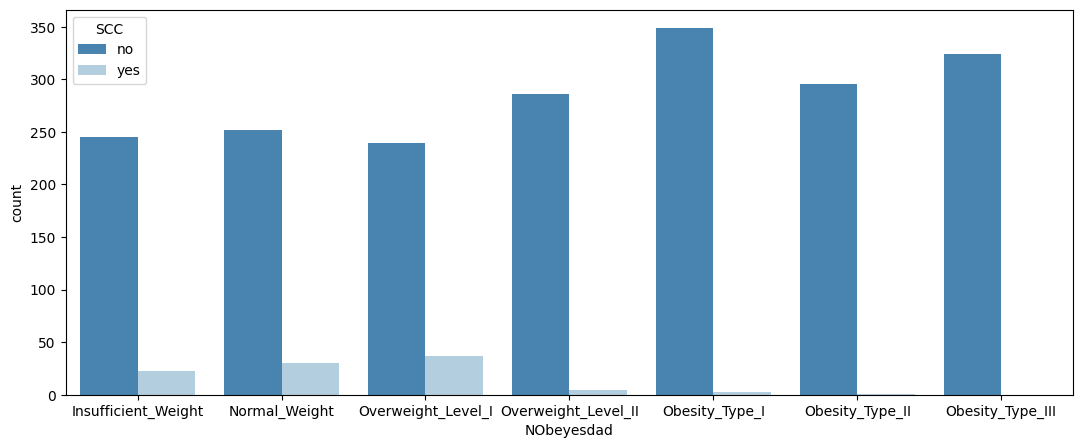

In [156]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

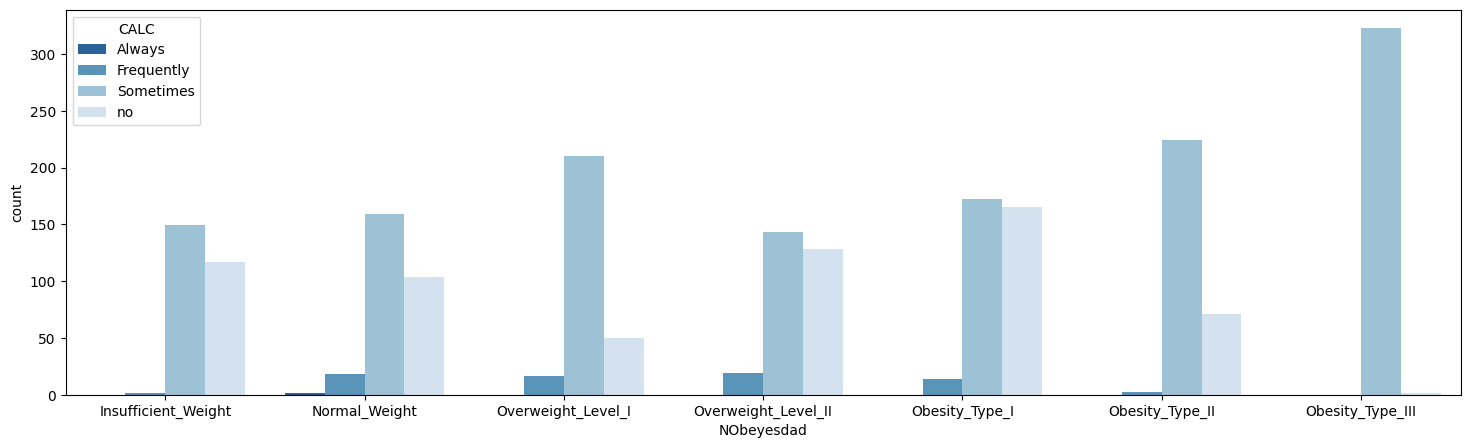

In [157]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

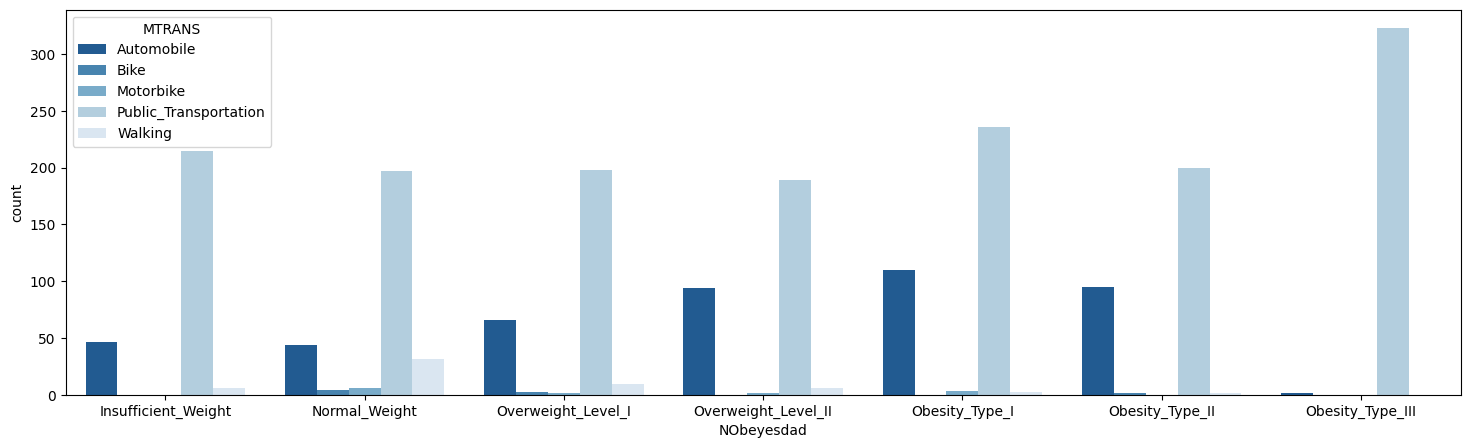

In [158]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [159]:
df_numeric = df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

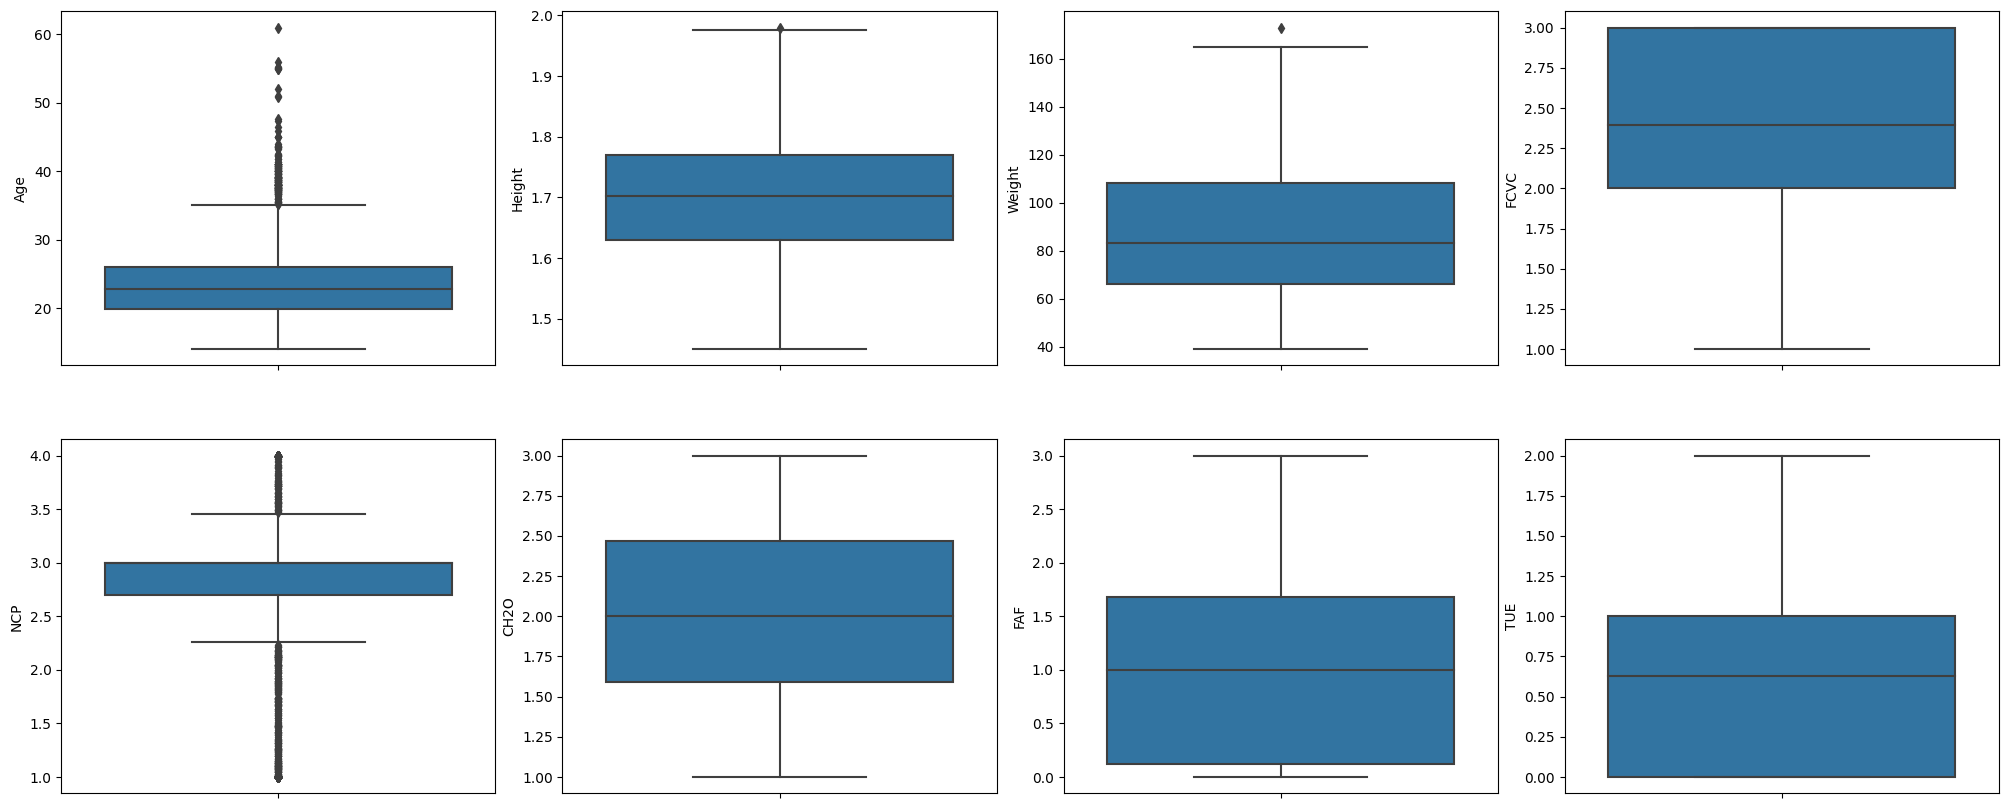

In [160]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in df_numeric.items():
    sns.boxplot(y = k, data = df_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

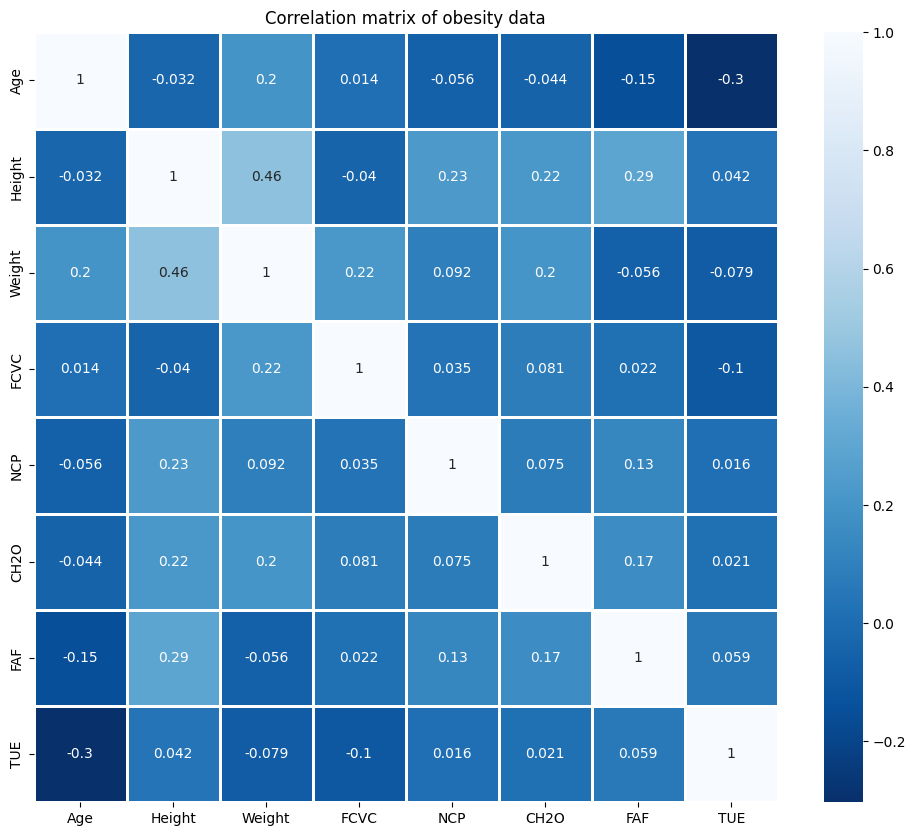

In [161]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

In [162]:
# handling categorical features

In [163]:
df_dummies = pd.get_dummies(df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]],drop_first=True)

In [164]:
df_target = df[["NObeyesdad"]]

In [165]:
df_concatenated = pd.concat([df_numeric, df_dummies, df_target], axis = 1)

In [166]:
df_concatenated .head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,1,...,0,0,0,0,1,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,1,1,0,1,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,1,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,0,0,1,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,1,0,Overweight_Level_II


In [167]:

X= df_concatenated.drop("NObeyesdad", axis = 1)
y = df_concatenated["NObeyesdad"]

In [168]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,...,0,0,0,0,1,0,0,0,1,0


In [169]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2087, dtype: category
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                         'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   float64
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   float64
 4   NCP                                 2087 non-null   float64
 5   CH2O                                2087 non-null   float64
 6   FAF                                 2087 non-null   float64
 7   TUE                                 2087 non-null   float64
 8   Gender_Male                         2087 non-null   uint8  
 9   family_history_with_overweight_yes  2087 non-null   uint8  
 10  FAVC_yes                            2087 non-null   uint8  
 11  CAEC_Frequently                     2087 no

In [171]:
X=X.astype("float")

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   float64
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   float64
 4   NCP                                 2087 non-null   float64
 5   CH2O                                2087 non-null   float64
 6   FAF                                 2087 non-null   float64
 7   TUE                                 2087 non-null   float64
 8   Gender_Male                         2087 non-null   float64
 9   family_history_with_overweight_yes  2087 non-null   float64
 10  FAVC_yes                            2087 non-null   float64
 11  CAEC_Frequently                     2087 no

In [173]:
encoder = LabelEncoder()

In [174]:
y=encoder.fit_transform(y)

In [175]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [176]:
y

array([1, 1, 1, ..., 4, 4, 4])

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [178]:
X_train.shape,y_train.shape

((1460, 23), (1460,))

In [179]:
X_test.shape,y_test.shape

((627, 23), (627,))

In [180]:
# standard scale data
std= StandardScaler()
X_train_scaled =std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

In [181]:
def clf_models(X_train, y_train, X_test, y_test):
    
    models = [          
          ('Random Forest', RandomForestClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('xgb',XGBClassifier())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_mm_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")      

In [182]:
clf_models(X_train,y_train,X_test,y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.94418
Accuracy w/Scaled Data (ss): 0.94258
Accuracy w/Scaled Data (mm): 0.94418

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        87
           1       0.82      0.88      0.85        95
           2       1.00      0.96      0.98       105
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        91
           5       0.90      0.94      0.92        80
           6       0.94      0.88      0.91        74

    accuracy                           0.94       627
   macro avg       0.94      0.94      0.94       627
weighted avg       0.95      0.94      0.94       627

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.93461
Accuracy w/Scaled Data (s

In [183]:
model=XGBClassifier()

## XGB classifier performs **best**

In [184]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [185]:
y_pred=model.predict_proba(X_test)

In [186]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.
    
    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

In [187]:
train_predict_score(model,X_train,y_train,X_test,y_test)

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9649122807017544
F1 on Test data: 0.965004400443769


In [188]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,classification_report

In [189]:
confusion_matrix(y_test,model.predict(X_test))

array([[ 83,   4,   0,   0,   0,   0,   0],
       [  3,  84,   0,   0,   0,   8,   0],
       [  0,   0, 104,   0,   0,   0,   1],
       [  0,   0,   0,  95,   0,   0,   0],
       [  0,   0,   0,   0,  91,   0,   0],
       [  0,   4,   0,   0,   0,  76,   0],
       [  0,   1,   0,   0,   0,   1,  72]])

In [190]:
accuracy_score(y_test,model.predict(X_test))

0.9649122807017544

In [191]:
cm = confusion_matrix(y_test,model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

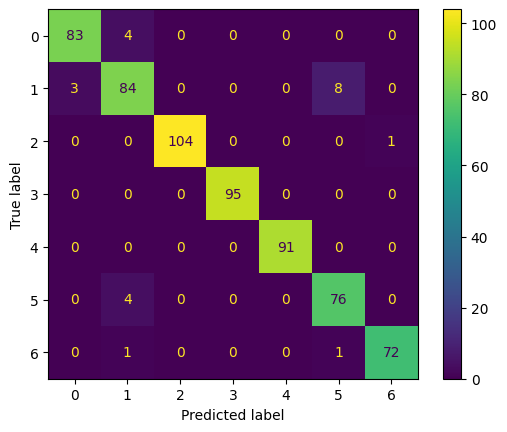

In [192]:
disp.plot()

In [193]:
roc_auc_score(y_test,y_pred,multi_class="ovr")

0.9988857911642057

In [194]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        87
           1       0.90      0.88      0.89        95
           2       1.00      0.99      1.00       105
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        91
           5       0.89      0.95      0.92        80
           6       0.99      0.97      0.98        74

    accuracy                           0.96       627
   macro avg       0.96      0.96      0.96       627
weighted avg       0.97      0.96      0.97       627



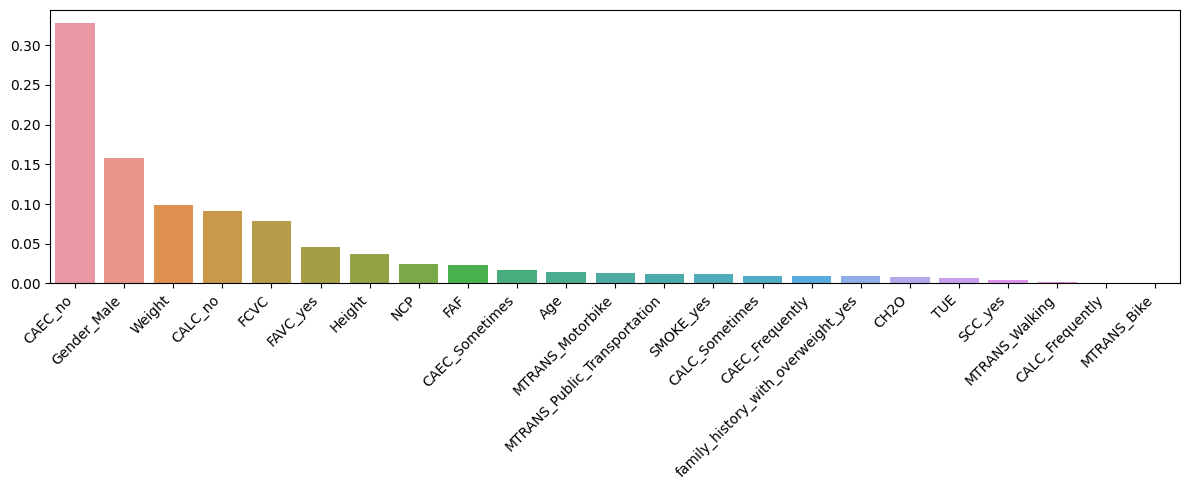


Top 10 Features:
Variable: CAEC_no              Importance: 0.33000001311302185
Variable: Gender_Male          Importance: 0.1599999964237213
Variable: Weight               Importance: 0.10000000149011612
Variable: CALC_no              Importance: 0.09000000357627869
Variable: FCVC                 Importance: 0.07999999821186066
Variable: FAVC_yes             Importance: 0.05000000074505806
Variable: Height               Importance: 0.03999999910593033
Variable: NCP                  Importance: 0.019999999552965164
Variable: FAF                  Importance: 0.019999999552965164
Variable: CAEC_Sometimes       Importance: 0.019999999552965164

Bottom 10 Features:
Variable: SCC_yes              Importance: 0.0
Variable: CALC_Frequently      Importance: 0.0
Variable: MTRANS_Bike          Importance: 0.0
Variable: MTRANS_Walking       Importance: 0.0
Variable: Age                  Importance: 0.009999999776482582
Variable: CH2O                 Importance: 0.009999999776482582
Variable: TUE

In [195]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nTop 10 Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Sort the feature importances by least important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print("\nBottom 10 Features:")
display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]